In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('nndb_flat.csv')
df

,ID,FoodGroup,ShortDescrip,Descrip,CommonName,MfgName,ScientificName,Energy_kcal,Protein_g,Fat_g,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,1001,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,1002,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,1003,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",NaN,NaN,NaN,876.0,0.28,99.48,...,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,1004,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue",NaN,NaN,NaN,353.0,21.40,28.74,...,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,1005,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick",NaN,NaN,NaN,371.0,23.24,29.68,...,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,83110,Finfish and Shellfish Products,"MACKEREL,SALTED","Fish, mackerel, salted",NaN,NaN,NaN,305.0,18.50,25.10,...,0.0375,0.206250,0.146154,0.016667,0.055000,0.000111,0.142857,0.362857,1.334545,0.100000
8614,90240,Finfish and Shellfish Products,"SCALLOP,(BAY&SEA),CKD,STMD","Mollusks, scallop, (bay and sea), cooked, steamed",NaN,NaN,NaN,111.0,20.54,0.84,...,0.0500,0.067250,0.018462,0.010000,0.008333,0.000037,0.088095,0.608571,0.394545,0.140909
8615,90480,Sweets,"SYRUP,CANE","Syrup, Cane",NaN,NaN,NaN,269.0,0.00,0.00,...,0.0000,0.006250,0.046154,0.108333,0.010833,0.000022,0.023810,0.011429,0.012727,0.017273
8616,90560,Finfish and Shellfish Products,"SNAIL,RAW","Mollusks, snail, raw",NaN,NaN,NaN,90.0,16.10,1.40,...,0.0150,0.087500,0.092308,0.008333,0.008333,0.000444,0.595238,0.388571,0.498182,0.090909


In [3]:
used = []
corrs = []
for i, j in enumerate(df.corr().columns):
    for k in range(len(df.corr())):
        if ((df.corr().iloc[k, i] > 0.9) & 
            (j not in used) &
            (j != df.corr().index[k])):
            
            used.append(j)
            corrs.append((j, df.corr().index[k], 
                          np.round(df.corr().iloc[k, i], 2)))

            
corrsdf = pd.DataFrame([[i[0] for i in corrs],
                        [i[1] for i in corrs],
                        [i[2] for i in corrs]])

corrsdf = corrsdf.T.rename(columns = {0:'column',1:'row',2:'corr'})
corrsdf[:15]

,column,row,corr
0,VitA_mcg,VitA_USRDA,1.0
1,VitB6_mg,VitB6_USRDA,1.0
2,VitB12_mcg,VitB12_USRDA,1.0
3,VitC_mg,VitC_USRDA,1.0
4,VitE_mg,VitE_USRDA,1.0
5,Folate_mcg,Folate_USRDA,1.0
6,Niacin_mg,Niacin_USRDA,1.0
7,Riboflavin_mg,Riboflavin_USRDA,1.0
8,Thiamin_mg,Thiamin_USRDA,1.0
9,Calcium_mg,Calcium_USRDA,1.0


In [4]:
df.drop(df.columns[df.columns.str.contains('_USRDA')].values, 
        inplace=True, axis=1)

In [5]:
df.set_index('ID', inplace=True)
df_desc = df.iloc[:, :6]
df.drop(df.columns[:6].values, axis=1, inplace=True)

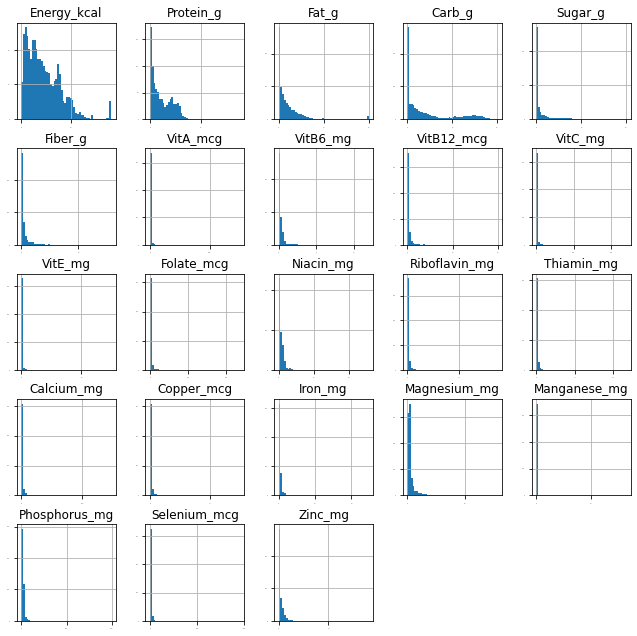

In [7]:
%matplotlib inline
ax = df.hist(bins=50, xlabelsize=-1, ylabelsize=-1, figsize=(11,11))

In [8]:
from scipy.stats import boxcox
# add 1 because data must be positive (we have many zeros)
df = df + 1
df_TF = pd.DataFrame(index=df.index)
for i in df.columns.values:
    df_TF["%s_TF" % i] = boxcox(df.loc[:, i])[0]

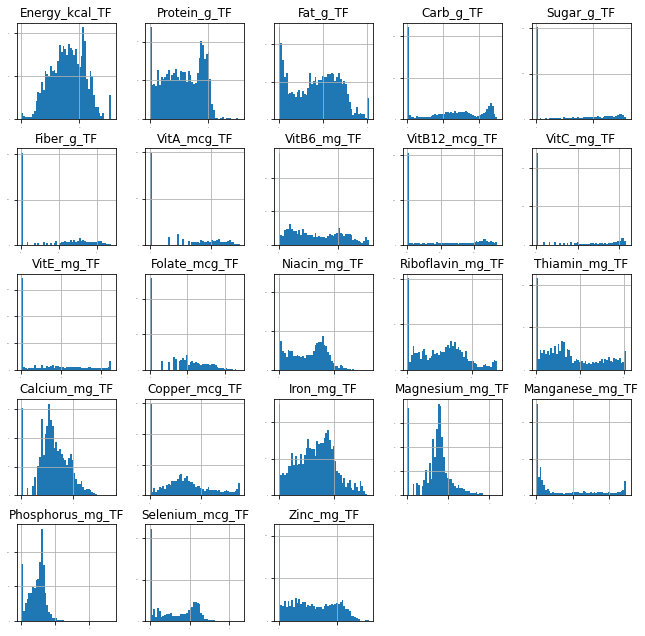

In [9]:
ax = df_TF.hist(bins=50, xlabelsize=-1, ylabelsize=-1, figsize=(11,11))

In [11]:
df_TF = StandardScaler().fit_transform(df_TF)

print("mean: ", np.round(df_TF.mean(), 2))
print("standard dev: ", np.round(df_TF.std(), 2))

mean:  0.0
standard dev:  1.0


In [12]:
fit = PCA()
pca = fit.fit_transform(df_TF)

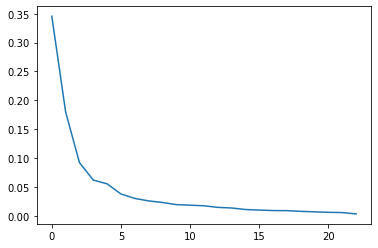

In [13]:
plt.plot(fit.explained_variance_ratio_)

In [14]:
print(fit.explained_variance_ratio_)
print(fit.explained_variance_ratio_[:5].sum())

[0.34554936 0.17971019 0.09201387 0.06176452 0.05520037 0.03764111
 0.02996247 0.02566808 0.02294417 0.0192006  0.01828886 0.01721459
 0.01443828 0.01337614 0.0107629  0.00977106 0.00894584 0.00878398
 0.00760274 0.00668982 0.00589323 0.00545379 0.00312402]
0.734238306925474


In [15]:

pca = pd.DataFrame(pca[:, :5], index=df.index)
pca = pca.join(df_desc)
pca.drop(['CommonName','MfgName','ScientificName'], axis=1, inplace=True)
pca.rename(columns={0:'c1',1:'c2',2:'c3',3:'c4',4:'c5'}, inplace=True)

In [16]:
np.round(pca.corr(), 5)

,c1,c2,c3,c4,c5
c1,1.0,-0.0,0.0,-0.0,0.0
c2,-0.0,1.0,0.0,0.0,-0.0
c3,0.0,0.0,1.0,0.0,0.0
c4,-0.0,0.0,0.0,1.0,0.0
c5,0.0,-0.0,0.0,0.0,1.0


In [17]:
vects = fit.components_[:5]

one = pd.Series(vects[0], index=df.columns)
one.sort_values(ascending=False)

Zinc_mg          0.308506
Phosphorus_mg    0.305000
Niacin_mg        0.294094
Protein_g        0.286086
Riboflavin_mg    0.282687
VitB6_mg         0.270646
Selenium_mcg     0.264114
Iron_mg          0.262314
Magnesium_mg     0.260245
Thiamin_mg       0.235440
VitB12_mcg       0.221322
Copper_mcg       0.220232
Folate_mcg       0.167856
Energy_kcal      0.165126
Fat_g            0.161488
Calcium_mg       0.135512
VitE_mg          0.090808
Manganese_mg     0.088762
VitA_mcg         0.056996
Fiber_g         -0.004663
Carb_g          -0.033767
VitC_mg         -0.069830
Sugar_g         -0.076132
dtype: float64

In [18]:
two = pd.Series(vects[1], index=df.columns)
two.sort_values(ascending=False)

Carb_g           0.414542
Fiber_g          0.397832
Manganese_mg     0.343603
Sugar_g          0.295640
VitC_mg          0.242314
Folate_mcg       0.238391
Calcium_mg       0.231052
Magnesium_mg     0.199838
Copper_mcg       0.181631
Thiamin_mg       0.159641
Iron_mg          0.118917
VitE_mg          0.104310
VitA_mcg         0.095701
Energy_kcal      0.041850
Riboflavin_mg    0.024240
Phosphorus_mg   -0.001517
VitB6_mg        -0.052166
Niacin_mg       -0.064197
Zinc_mg         -0.100529
Fat_g           -0.123575
Selenium_mcg    -0.138883
Protein_g       -0.196127
VitB12_mcg      -0.265671
dtype: float64

In [19]:
three = pd.Series(vects[2], index=df.columns)
three.sort_values(ascending=False)

Energy_kcal      0.508062
Fat_g            0.409505
Carb_g           0.250952
Sugar_g          0.208651
Thiamin_mg       0.191124
Fiber_g          0.153640
Iron_mg          0.115065
Riboflavin_mg    0.062074
Niacin_mg        0.055991
Protein_g        0.026828
Phosphorus_mg   -0.010948
VitE_mg         -0.012473
Zinc_mg         -0.051002
Magnesium_mg    -0.100792
VitB12_mcg      -0.107476
Manganese_mg    -0.108755
VitB6_mg        -0.121850
Calcium_mg      -0.125621
Selenium_mcg    -0.131798
Copper_mcg      -0.177702
Folate_mcg      -0.264298
VitA_mcg        -0.298089
VitC_mg         -0.334490
dtype: float64

In [20]:
four = pd.Series(vects[3], index=df.columns)
four.sort_values(ascending=False)

VitA_mcg         0.539792
VitE_mg          0.537710
Fat_g            0.282774
Sugar_g          0.279657
Calcium_mg       0.188343
VitB12_mcg       0.167068
Energy_kcal      0.158787
VitC_mg          0.129288
Selenium_mcg     0.063452
Riboflavin_mg    0.061855
Folate_mcg       0.011655
VitB6_mg        -0.011382
Phosphorus_mg   -0.022623
Carb_g          -0.025185
Zinc_mg         -0.055472
Niacin_mg       -0.065223
Thiamin_mg      -0.086530
Protein_g       -0.090944
Fiber_g         -0.119122
Magnesium_mg    -0.131683
Iron_mg         -0.149698
Copper_mcg      -0.167872
Manganese_mg    -0.203804
dtype: float64

In [21]:
five = pd.Series(vects[4], index=df.columns)
five.sort_values(ascending=False)

Riboflavin_mg    0.322545
Thiamin_mg       0.281944
Niacin_mg        0.264423
Sugar_g          0.264262
VitB6_mg         0.254663
VitC_mg          0.249634
VitB12_mcg       0.195637
Iron_mg          0.158585
Carb_g           0.101396
Fiber_g          0.075900
VitA_mcg         0.057928
Zinc_mg         -0.029074
Calcium_mg      -0.035398
Protein_g       -0.046148
Phosphorus_mg   -0.084178
Folate_mcg      -0.105000
Magnesium_mg    -0.143789
Selenium_mcg    -0.163561
Energy_kcal     -0.204336
VitE_mg         -0.250605
Fat_g           -0.266740
Copper_mcg      -0.316998
Manganese_mg    -0.347515
dtype: float64

In [22]:
pca.sort_values(by='c1')['FoodGroup'][:500].value_counts()

Soups, Sauces, and Gravies             190
Beverages                              167
Sweets                                  45
Vegetables and Vegetable Products       20
Legumes and Legume Products             16
Fruits and Fruit Juices                 16
Baby Foods                              10
Meals, Entrees, and Side Dishes          9
Fats and Oils                            7
Spices and Herbs                         7
American Indian/Alaska Native Foods      5
Snacks                                   3
Fast Foods                               2
Baked Products                           2
Sausages and Luncheon Meats              1
Name: FoodGroup, dtype: int64

In [23]:
pca.sort_values(by='c2')['FoodGroup'][:500].value_counts()

Beef Products                          353
Lamb, Veal, and Game Products           71
Poultry Products                        21
American Indian/Alaska Native Foods     13
Fats and Oils                           13
Pork Products                            9
Finfish and Shellfish Products           8
Sausages and Luncheon Meats              4
Restaurant Foods                         3
Fast Foods                               3
Beverages                                2
Name: FoodGroup, dtype: int64

In [24]:
pca.sort_values(by='c3')['FoodGroup'][:500].value_counts()

Vegetables and Vegetable Products      344
Finfish and Shellfish Products          68
Poultry Products                        19
Beverages                               10
Soups, Sauces, and Gravies              10
Fruits and Fruit Juices                  9
Lamb, Veal, and Game Products            9
Baby Foods                               7
Spices and Herbs                         6
Fast Foods                               5
Beef Products                            4
Pork Products                            4
Nut and Seed Products                    2
American Indian/Alaska Native Foods      2
Dairy and Egg Products                   1
Name: FoodGroup, dtype: int64

In [25]:
pca.sort_values(by='c4')['FoodGroup'][:500].value_counts()

Legumes and Legume Products            124
Cereal Grains and Pasta                 98
Vegetables and Vegetable Products       89
Baked Products                          39
Nut and Seed Products                   34
Breakfast Cereals                       23
Snacks                                  19
American Indian/Alaska Native Foods     18
Beverages                               16
Sweets                                  15
Lamb, Veal, and Game Products            6
Sausages and Luncheon Meats              6
Spices and Herbs                         5
Fruits and Fruit Juices                  2
Soups, Sauces, and Gravies               2
Finfish and Shellfish Products           2
Baby Foods                               1
Poultry Products                         1
Name: FoodGroup, dtype: int64

In [26]:
pca.sort_values(by='c5')['FoodGroup'][:500].value_counts()

Fats and Oils                          145
Nut and Seed Products                   81
Sweets                                  51
Legumes and Legume Products             50
Snacks                                  41
Baked Products                          24
Sausages and Luncheon Meats             17
American Indian/Alaska Native Foods     16
Dairy and Egg Products                  13
Finfish and Shellfish Products          12
Cereal Grains and Pasta                 12
Breakfast Cereals                        8
Fast Foods                               5
Restaurant Foods                         4
Spices and Herbs                         4
Poultry Products                         3
Beverages                                3
Beef Products                            3
Pork Products                            2
Lamb, Veal, and Game Products            2
Baby Foods                               1
Fruits and Fruit Juices                  1
Soups, Sauces, and Gravies               1
Vegetables 